**Libraries import and magic commands**

In [194]:
import geopandas as gpd
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
import numpy as np

%reload_ext autoreload
%autoreload 2
%matplotlib inline

**Quebec Railway Network EDA**

https://open.canada.ca/data/en/dataset/c2c4f386-a736-4eaa-b5b6-28c3a8f75466

Here I'm using the second package in the list, "Railway network", in Geojson format

In [195]:
qgdf = gpd.read_file('ReseauFerroviaire.geojson') #Quebec geodataframe
qgdf.head()

,version,idsegchfer,nomvoie,classvoie,classvoic,typeutilis,typeutilic,etat,etatc,nmfrexploi,...,debsubdiv1,finsubdiv1,nomsubdiv2,debsubdiv2,finsubdiv2,nivhierar,nivhierarc,typestruct,objectid,geometry
0,20240411,36.0,Aucun,Inconnu,-1,Marchandises,1,Opérationnel,3,CSX Transportation,...,0.0,0.0,,0.0,0.0,Tronçon essentiel,1.0,,1,"LINESTRING (-74.11917 45.19140, -74.11962 45.1..."
1,20240411,37.0,Aucun,Inconnu,-1,Marchandises,1,Opérationnel,3,CSX Transportation,...,0.0,0.0,,0.0,0.0,Tronçon essentiel,1.0,Pont,2,"LINESTRING (-74.11907 45.19158, -74.11909 45.1..."
2,20240411,38.0,Aucun,Inconnu,-1,Marchandises,1,Opérationnel,3,CSX Transportation,...,0.0,0.0,,0.0,0.0,Tronçon essentiel,1.0,,3,"LINESTRING (-74.11667 45.21052, -74.11533 45.2..."
3,20240411,39.0,Aucun,Inconnu,-1,Marchandises,1,Opérationnel,3,CSX Transportation,...,0.0,0.0,,0.0,0.0,Tronçon essentiel,1.0,Pont,4,"LINESTRING (-74.11682 45.21072, -74.11677 45.2..."
4,20240411,40.0,Aucun,Inconnu,-1,Marchandises,1,Opérationnel,3,CSX Transportation,...,0.0,0.0,,0.0,0.0,Tronçon essentiel,1.0,,5,"LINESTRING (-74.11833 45.21282, -74.11682 45.2..."


In [196]:
qgdf.tail()

,version,idsegchfer,nomvoie,classvoie,classvoic,typeutilis,typeutilic,etat,etatc,nmfrexploi,...,debsubdiv1,finsubdiv1,nomsubdiv2,debsubdiv2,finsubdiv2,nivhierar,nivhierarc,typestruct,objectid,geometry
12821,20240411,12946.0,Grande-Anse,Triage,4,Marchandises,4,Opérationnel,3,Administration portuaire du Saguenay,...,0.0,0.0,Aucun,-1.0,-1.0,Non-classifié,0.0,,12822,"LINESTRING (-70.96765 48.35537, -70.96741 48.3..."
12822,20240411,12947.0,Grande-Anse,Principale,1,Marchandises,4,Opérationnel,3,Administration portuaire du Saguenay,...,0.0,0.0,Aucun,-1.0,-1.0,Non-classifié,0.0,,12823,"LINESTRING (-70.86566 48.40113, -70.86627 48.4..."
12823,20240411,12948.0,Grande-Anse,Principale,1,Marchandises,4,Opérationnel,3,Administration portuaire du Saguenay,...,0.0,0.0,Aucun,-1.0,-1.0,Non-classifié,0.0,,12824,"LINESTRING (-70.96447 48.35903, -70.96509 48.3..."
12824,20240411,12949.0,Grande-Anse,Triage,4,Marchandises,4,Opérationnel,3,Administration portuaire du Saguenay,...,0.0,0.0,Aucun,-1.0,-1.0,Non-classifié,0.0,,12825,"LINESTRING (-70.96468 48.35871, -70.96455 48.3..."
12825,20240411,12950.0,Grande-Anse,Triage,4,Marchandises,4,Opérationnel,3,Administration portuaire du Saguenay,...,0.0,0.0,Aucun,-1.0,-1.0,Non-classifié,0.0,,12826,"LINESTRING (-70.96765 48.35537, -70.96745 48.3..."


**Many of the .explore() calls are commented to reduce the size of this notebook**

In [197]:
#qgdf.explore()

In [198]:
qgdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12826 entries, 0 to 12825
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   version     12826 non-null  object  
 1   idsegchfer  12826 non-null  float64 
 2   nomvoie     12826 non-null  object  
 3   classvoie   12826 non-null  object  
 4   classvoic   12826 non-null  int64   
 5   typeutilis  12826 non-null  object  
 6   typeutilic  12826 non-null  int64   
 7   etat        12826 non-null  object  
 8   etatc       12826 non-null  int64   
 9   nmfrexploi  12826 non-null  object  
 10  siglexploi  12826 non-null  object  
 11  debsubexpl  12826 non-null  float64 
 12  finsubexpl  12826 non-null  float64 
 13  nmfrpropr   12826 non-null  object  
 14  nmfruti1vo  12826 non-null  object  
 15  siguti1vo   12826 non-null  object  
 16  nmfruti2vo  12826 non-null  object  
 17  siguti2vo   12826 non-null  object  
 18  nomsubdiv1  12826 non-null  object  
 

In [199]:
with pd.option_context('display.max_columns', None):
    print(qgdf.describe(include='all'))

         version    idsegchfer nomvoie   classvoie     classvoic  \
count      12826  12826.000000   12826       12826  12826.000000   
unique         1           NaN     134           9           NaN   
top     20240411           NaN   Aucun  Principale           NaN   
freq       12826           NaN    8491        3885           NaN   
mean         NaN   6466.741151     NaN         NaN      2.673164   
std          NaN   3739.448301     NaN         NaN      1.334266   
min          NaN      1.000000     NaN         NaN     -1.000000   
25%          NaN   3228.250000     NaN         NaN      1.000000   
50%          NaN   6459.500000     NaN         NaN      3.000000   
75%          NaN   9699.750000     NaN         NaN      4.000000   
max          NaN  12950.000000     NaN         NaN      8.000000   

          typeutilis    typeutilic          etat         etatc  \
count          12826  12826.000000         12826  12826.000000   
unique             6           NaN             4   

**Ontario Railway Network EDA**

https://geohub.lio.gov.on.ca/maps/mnrf::ontario-railway-network-orwn/about

I downloaded the first package in the list, "ORWN Track", in Shapefile format

In [200]:
ogdf = gpd.read_file('LIO-2022-10-19') #Ontario geodataframe
ogdf.head()

,OGF_ID,TRACKNID,TRACKSEGID,TRACKNAME,TRACKCLASS,REGULATOR,TRANSPTYPE,USETYPE,GAUGE,NUMTRACKS,...,GEOREVDATE,GEOACQTECH,GEOACCURA,GEOPROVIDE,ATTCREDATE,ATTREVDATE,ATTACQTECH,ATTPROVIDE,EFF_DATE,geometry
0,9343,0b60705a166b484ba0dd21479720f078,fa7b1cff442d48e3b56fb1a993e9a2a3,MacMillan,Yard,Unknown,Train,Freight,Standard,1,...,2016,Vector Data,10,Provincial/Territorial,2016,2016,Vector Data,Federal,20170518133441,"LINESTRING (-79.50921 43.81075, -79.50914 43.8..."
1,9344,9558350875c4430aba59e63be83a64aa,1b6f3c363dd54d52a052e67b6942e360,None,Spur,Unknown,Train,Freight and Passenger,Standard,1,...,2016,Orthoimage,10,Federal,201306,2016,Vector Data,Federal,20170518133441,"LINESTRING (-79.52190 43.61510, -79.52160 43.6..."
2,9345,ad66c5f6e69e48bfa1ba11bd40f70bbf,54890f6586d34072928faaa1b92200cc,None,Spur,Unknown,Train,Freight,Standard,1,...,2016,Vector Data,10,Provincial/Territorial,2016,2016,Vector Data,Federal,20170518133441,"LINESTRING (-81.53947 43.61135, -81.53913 43.6..."
3,9346,b664ac3abf2247e9b634be0ec4f999b5,a8639a31ea0c4ee8b0e00869b3e5cf02,None,Yard,Unknown,Train,Freight,Standard,1,...,2016,Orthoimage,10,Federal,2016,2016,Vector Data,Federal,20170518133441,"LINESTRING (-80.08371 42.90935, -80.08376 42.9..."
4,9600,4688fdb4bf2646c2a0ddd3fbd95b7af5,fe65c86b3f3f4fee985fafd411e0537b,Interchange,Connecting,Unknown,Train,Freight,Standard,1,...,2016,Vector Data,10,Provincial/Territorial,201306,2016,Vector Data,Federal,20170518133441,"LINESTRING (-81.22126 42.99901, -81.22079 42.9..."


In [201]:
ogdf.tail()

,OGF_ID,TRACKNID,TRACKSEGID,TRACKNAME,TRACKCLASS,REGULATOR,TRANSPTYPE,USETYPE,GAUGE,NUMTRACKS,...,GEOREVDATE,GEOACQTECH,GEOACCURA,GEOPROVIDE,ATTCREDATE,ATTREVDATE,ATTACQTECH,ATTPROVIDE,EFF_DATE,geometry
19050,9338,5592448c4dfd4740b801e9372c65905c,2f04a622ca3144d8b4544cfb2e6cbcb2,Chrysler,Spur,Unknown,Train,Freight,Standard,1,...,2016,Orthoimage,10,Federal,201306,2016,Vector Data,Federal,20170518133441,"LINESTRING (-82.94483 42.29304, -82.94400 42.2..."
19051,9339,8d13f8d6fa9c43dbbed9813d04c909e8,18eaa1f3a6da4bf7a07274ef340ea9a4,C Yard South Industrial,Yard,Unknown,Train,Freight,Standard,1,...,2016,Vector Data,10,Provincial/Territorial,2016,2016,Vector Data,Federal,20170518133441,"LINESTRING (-78.87781 43.86528, -78.87808 43.8..."
19052,9340,daf99a3289d04c36884c0fbbefd3e75c,461482e10a064605a7d11a3908bee9db,MacMillan,Yard,Unknown,Train,Freight,Standard,1,...,2016,Vector Data,10,Provincial/Territorial,2016,2016,Vector Data,Federal,20170518133441,"LINESTRING (-79.50779 43.79205, -79.50779 43.7..."
19053,9341,5eb43bd6dfc64d88929ec765c41f7ea3,d6119bdcf83441eeb049d9068dcc9e59,None,Main,Unknown,Train,Freight and Passenger,Standard,1,...,2016,Vector Data,10,Provincial/Territorial,201306,2016,Vector Data,Federal,20170518133441,"LINESTRING (-81.22028 42.98636, -81.22142 42.9..."
19054,9342,c559f9bc92ee4d8d8d5c989e3ff45a01,729c9ba21b0b472dad2e4141b0802a8a,Guelph North,Spur,Unknown,Train,Freight,Standard,1,...,2016,Orthoimage,10,Federal,2016,2016,Vector Data,Federal,20170518133441,"LINESTRING (-80.26329 43.53671, -80.26339 43.5..."


In [202]:
#ogdf.explore()

In [203]:
ogdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19055 entries, 0 to 19054
Data columns (total 60 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OGF_ID      19055 non-null  int64   
 1   TRACKNID    19055 non-null  object  
 2   TRACKSEGID  19055 non-null  object  
 3   TRACKNAME   19055 non-null  object  
 4   TRACKCLASS  19055 non-null  object  
 5   REGULATOR   19055 non-null  object  
 6   TRANSPTYPE  19055 non-null  object  
 7   USETYPE     19055 non-null  object  
 8   GAUGE       19055 non-null  object  
 9   NUMTRACKS   19055 non-null  int64   
 10  ELECTRIC    19055 non-null  object  
 11  STATUS      19055 non-null  object  
 12  SPEEDFREIT  19055 non-null  int64   
 13  SPEEDPASSE  19055 non-null  int64   
 14  UNITOFSPEE  19055 non-null  object  
 15  SOURCEID    19055 non-null  object  
 16  OPERATOENA  19055 non-null  object  
 17  OPERATOFNA  19055 non-null  object  
 18  OPERATORMK  19055 non-null  object  
 

In [204]:
with pd.option_context('display.max_columns', None):
    print(ogdf.describe(include='all'))

              OGF_ID                          TRACKNID  \
count   19055.000000                             19055   
unique           NaN                             19008   
top              NaN  6121b96f4a4e4cc2a2433249aa083b65   
freq             NaN                                 3   
mean     9528.000000                               NaN   
std      5500.849025                               NaN   
min         1.000000                               NaN   
25%      4764.500000                               NaN   
50%      9528.000000                               NaN   
75%     14291.500000                               NaN   
max     19055.000000                               NaN   

                              TRACKSEGID TRACKNAME TRACKCLASS REGULATOR  \
count                              19055     19055      19055     19055   
unique                             19055       335          8         1   
top     fa7b1cff442d48e3b56fb1a993e9a2a3      None       Yard   Unknown   
fre

**Now I need to create track_ids for each dataframe, some more EDA and investigating**

**Quebec**

https://www.donneesquebec.ca/recherche/dataset/reseau-ferroviaire

Metadata for Quebec's Rail Network dataset (column descriptions)

In [205]:
qgdf['idsegchfer'].value_counts()

idsegchfer
11203.0    2
9945.0     2
6715.0     2
36.0       1
8590.0     1
          ..
4289.0     1
4290.0     1
4291.0     1
4292.0     1
12950.0    1
Name: count, Length: 12823, dtype: int64

In [206]:
qgdf['track_id'] = qgdf['siglexploi'] + "_" + qgdf['nomsubdiv1']

In [207]:
with pd.option_context('display.max_rows', None):
    print(qgdf['track_id'].value_counts())

track_id
CN_St-Laurent                          1368
CFCP_Adirondack                         777
CN_St-Hyacinthe                         664
CN_Sorel                                518
CN_Montmagny                            492
CN_Lac St-Jean                          488
CFQG_Trois-Rivieres                     482
CFCP_St-Luc Branch                      464
CN_Bridge                               354
QNSL_Wacouna                            330
AMIC_Cartier                            247
CN_Drummondville                        242
CN_Montreal                             227
CN_Val d'Or                             224
APM_Unknown                             224
SLQ_Sherbrooke                          220
CN_Joliette                             214
CN_Taschereau                           213
CN_La Tuque                             208
CN_Valleyfield                          207
CFCP_Vaudreuil                          200
REM_Deux-Montagnes                      195
CN_Mont-Joli           

In [208]:
qgdf_selected = qgdf[['track_id', 'siglexploi', 'nomsubdiv1', 'geometry']]

In [209]:
#qgdf_selected.explore(column='track_id', legend=False, tiles='CartoDB positron', cmap='gist_ncar')

In [210]:
#qgdf_selected.explore(column='nomsubdiv1', legend=False, tiles='CartoDB positron', cmap='gist_ncar')

In [211]:
#qgdf_selected.explore(column='siglexploi', legend=False, tiles='CartoDB positron', cmap='gist_ncar')

In [212]:
(len(qgdf_selected['track_id'].unique()), len(qgdf_selected['nomsubdiv1'].unique())) #more track_ids than nomsubdiv1s

(94, 68)

**Outcome from the code above - we will use 'track_id' as a main identificator for Quebec's tracks**

**Ontario**

https://geohub.lio.gov.on.ca/maps/mnrf::ontario-railway-network-orwn/about

ORWN Track - Data Description (PDF) and ORWN Track - Documentation (PDF)

Metadata for Ontario's Rail Network dataset (column descriptions)

In [213]:
#ogdf[['TRACKNAME', 'geometry']].explore(column='TRACKNAME', legend=False, tiles='CartoDB positron', cmap='gist_ncar')
#not very good identifier

In [214]:
ogdf['track_id'] = ogdf['OPERATORMK'] + "_" + ogdf['SUBDI1NAME'] #same logic here - to combine operator and subdivision

In [215]:
ogdf_selected = ogdf[['track_id', 'geometry']]
#ogdf_selected.explore(column='track_id', legend=False, tiles='CartoDB positron', cmap='gist_ncar')

**Outcome from the code above - 'track_id' as a main identificator for Ontario's tracks (same as with Quebec)**

**Now we need to align crs for our datasets**

In [216]:
qgdf_selected.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [217]:
ogdf_selected.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

**Let's use WGS 84**

In [218]:
ogdf_selected_converted = ogdf_selected.to_crs(qgdf_selected.crs)

In [219]:
qgdf_selected.crs == ogdf_selected_converted.crs

True

In [220]:
qgdf_selected = qgdf_selected.drop(columns=['siglexploi', 'nomsubdiv1'])
qgdf_selected.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12826 entries, 0 to 12825
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   track_id  12826 non-null  object  
 1   geometry  12826 non-null  geometry
dtypes: geometry(1), object(1)
memory usage: 200.5+ KB


In [221]:
ogdf_selected_converted.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19055 entries, 0 to 19054
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   track_id  19055 non-null  object  
 1   geometry  19055 non-null  geometry
dtypes: geometry(1), object(1)
memory usage: 297.9+ KB


In [222]:
gdf = pd.concat([qgdf_selected, ogdf_selected_converted], ignore_index=True)
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 31881 entries, 0 to 31880
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   track_id  31881 non-null  object  
 1   geometry  31881 non-null  geometry
dtypes: geometry(1), object(1)
memory usage: 498.3+ KB


In [223]:
#gdf.explore(column='track_id', legend=False, tiles='CartoDB positron', cmap='gist_ncar')

**Now we have all the tracks in one geodataframe**

In [224]:
gdf.to_file('tracks.geojson', driver='GeoJSON')

**Let's open our DEM from a tif image**

The tif image was downloaded from here: https://portal.opentopography.org/raster?opentopoID=OTNED.012021.4269.2

**The bounding box I chose was:**

Xmin, Ymin = -81.82339, 42.666088

Xmax, Ymax = -72.224913, 47.067488

**Coordinates:**

Horizontal CoordinatesNAD83 [EPSG: 4269]

Vertical CoordinatesNAVD88 [EPSG: 5703]

**Some notes:**

It takes time to download data for big areas, mine was downloaded in approximately 20 minutes

If you look at this Jupyter Notebook in Github, there will be no tif file, just a placeholder, due to enormous size of the tif image (1.33 GB). Same goes for PostGIS database which has tiles 100x100 meters from that image, its size is about 4 GB

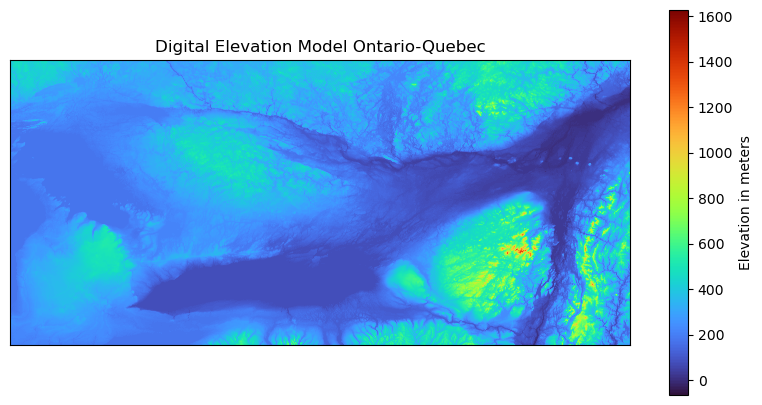

In [225]:
with rasterio.open('output_USGS30m.tif') as src:
    subset = src.read(1)
    plt.figure(figsize=(10, 5))
    plt.imshow(subset, cmap='turbo')
    plt.colorbar(label='Elevation in meters')
    plt.title('Digital Elevation Model Ontario-Quebec')
    plt.xticks([])
    plt.yticks([])
    plt.show()

**The goal of this Jupyter Notebook was to organize and export tracks and check DEM. Now we have tracks in Python and DEM tiles in PostGIS, so the next step will be putting those tracks in a separate table in the database**